In [1]:
import os
import sys
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt

data_dir = "data/raw"
processed_dir = "data/processed"

# We assume the folder structure is:
# my_project/
#   notebooks/
#   src/
#   data/
#
# So from notebooks/ we go one level up to my_project:
PROJECT_ROOT = os.path.abspath("..")  # points to my_project
sys.path.append(PROJECT_ROOT)

# Double-check
print("PROJECT_ROOT =", PROJECT_ROOT)
print("Contents:", os.listdir(PROJECT_ROOT))

# Now import the function
from src.data_processing.data_preprocessing import preprocess_point_clouds

# Now it should find data_processing.py inside src/data_processing
input_dir = os.path.join(PROJECT_ROOT, data_dir)
output_dir = os.path.join(PROJECT_ROOT, processed_dir)

voxel_size = 0.02
num_points = 2048
use_fps = True

print("Input directory:", input_dir)
print("Output directory:", output_dir)

# 3) Run the pipeline
preprocess_point_clouds(
    input_dir=input_dir,
    output_dir=output_dir,
    voxel_size=voxel_size,
    num_points=num_points,
    use_fps=use_fps
)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
PROJECT_ROOT = c:\Users\joe_h\Desktop\work_projects\Generative_3DWheatNet
Contents: ['.git', '.gitignore', 'data', 'network_architecture.md', 'notebooks', 'notes.txt', 'README.md', 'scripts', 'src']
Input directory: c:\Users\joe_h\Desktop\work_projects\Generative_3DWheatNet\data/raw
Output directory: c:\Users\joe_h\Desktop\work_projects\Generative_3DWheatNet\data/processed
Preprocessed => c:\Users\joe_h\Desktop\work_projects\Generative_3DWheatNet\data/processed\Wheat_Alsen_F0_2023-06-30-1949_fused_output_cluster_1.npz  [points=2048]
Preprocessed => c:\Users\joe_h\Desktop\work_projects\Generative_3DWheatNet\data/processed\Wheat_Alsen_F0_2023-06-30-1949_fused_output_cluster_2.npz  [points=2048]
Preprocessed => c:\Users\joe_h\Desktop\work_projects\Generative_3DWheatNet\data/processed\Wheat_Alsen_F0_2023-06-30-1949_fused_ou

In [2]:
# 4) Check results
# Let's see how many .npz files we got in 'processed'
processed_files = [f for f in os.listdir(output_dir) if f.endswith('.npz')]
print("Processed .npz files:", processed_files)

# We can load one for inspection
if processed_files:
    sample_npz = os.path.join(output_dir, processed_files[0])
    data = np.load(sample_npz)
    points = data["points"]
    print("Points shape:", points.shape)
    if "colors" in data.files:
        colors = data["colors"]
        print("Colors shape:", colors.shape)

Processed .npz files: ['Wheat_Alsen_F0_2023-06-30-1949_fused_output_cluster_1.npz', 'Wheat_Alsen_F0_2023-06-30-1949_fused_output_cluster_2.npz', 'Wheat_Alsen_F0_2023-06-30-1949_fused_output_cluster_3.npz', 'Wheat_Alsen_F0_2023-06-30-1949_fused_output_cluster_4.npz', 'Wheat_Alsen_F0_2023-06-30-1949_fused_output_cluster_5.npz', 'Wheat_Alsen_F1_2023-06-30-1901_fused_output_cluster_1.npz', 'Wheat_Alsen_F1_2023-06-30-1901_fused_output_cluster_2.npz', 'Wheat_Alsen_F1_2023-06-30-1901_fused_output_cluster_3.npz', 'Wheat_Alsen_F1_2023-06-30-1901_fused_output_cluster_4.npz', 'Wheat_Alsen_F2_2023-06-30-1925_fused_output_cluster_1.npz', 'Wheat_Alsen_F2_2023-06-30-1925_fused_output_cluster_2.npz', 'Wheat_Alsen_F2_2023-06-30-1925_fused_output_cluster_3.npz', 'Wheat_Alsen_F2_2023-06-30-1925_fused_output_cluster_4.npz', 'Wheat_Alsen_F2_2023-06-30-1925_fused_output_cluster_5.npz', 'Wheat_Alsen_F3_2023-06-30-2040_fused_output_cluster_2.npz', 'Wheat_Alsen_F3_2023-06-30-2040_fused_output_cluster_3.npz', '

In [3]:
first_file = processed_files[1]
first_file

'Wheat_Alsen_F0_2023-06-30-1949_fused_output_cluster_1.npz'

In [6]:
example_file = processed_files[1]

Points shape: (2048, 3)
Colors shape: (2048, 3)
Launching Open3D viewer. Close window to continue.


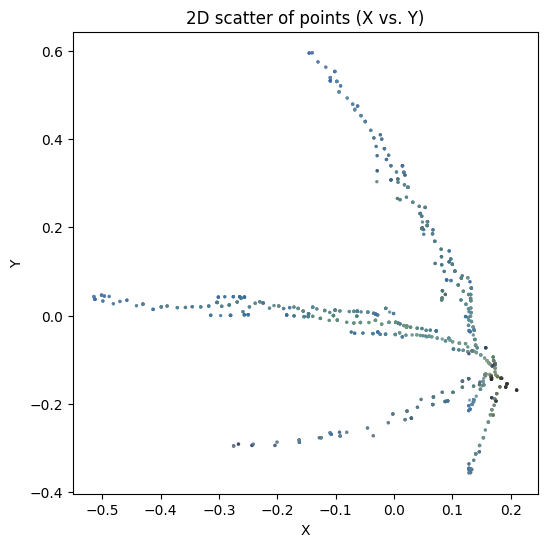

In [7]:
file_path = os.path.join(PROJECT_ROOT, processed_dir, example_file)
if not os.path.exists(file_path):
    print(f"File not found: {file_path}")
else:
    # 1) Load .npz
    data = np.load(file_path)
    points = data["points"]  # shape (N, 3)
    print("Points shape:", points.shape)

    colors = data["colors"] if "colors" in data.files else None
    if colors is not None:
        print("Colors shape:", colors.shape)

    # 2) Open3D Visualization
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(points)
    if colors is not None:
        pcd.colors = o3d.utility.Vector3dVector(colors)
    print("Launching Open3D viewer. Close window to continue.")
    o3d.visualization.draw_geometries([pcd])

    # 3) 2D Scatter Plot with Matplotlib
    # We'll just pick X vs. Y for quick check
    plt.figure(figsize=(6,6))
    plt.scatter(points[:,0], points[:,1], s=2, alpha=0.5,
                c=colors if colors is not None else "blue")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("2D scatter of points (X vs. Y)")
    plt.show()

    # Optionally, you could do a 3D scatter in Matplotlib, but it’s
    # often less interactive than Open3D. Example:
    #
    # from mpl_toolkits.mplot3d import Axes3D
    # fig = plt.figure(figsize=(7,7))
    # ax = fig.add_subplot(111, projection='3d')
    # ax.scatter(points[:,0], points[:,1], points[:,2],
    #            c=colors if colors is not None else "red", s=2)
    # plt.title("3D scatter in Matplotlib")
    # plt.show()